In [2544]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Loading and Exploration


In [2545]:
data = pd.read_csv("House_Rent_Dataset.csv")
data

,Posted On,BHK,Rent,Size,Floor,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact
0,2022-05-18,2,10000,1100,Ground out of 2,Super Area,Bandel,Kolkata,Unfurnished,Bachelors/Family,2,Contact Owner
1,2022-05-13,2,20000,800,1 out of 3,Super Area,"Phool Bagan, Kankurgachi",Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
2,2022-05-16,2,17000,1000,1 out of 3,Super Area,Salt Lake City Sector 2,Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
3,2022-07-04,2,10000,800,1 out of 2,Super Area,Dumdum Park,Kolkata,Unfurnished,Bachelors/Family,1,Contact Owner
4,2022-05-09,2,7500,850,1 out of 2,Carpet Area,South Dum Dum,Kolkata,Unfurnished,Bachelors,1,Contact Owner
...,...,...,...,...,...,...,...,...,...,...,...,...
4741,2022-05-18,2,15000,1000,3 out of 5,Carpet Area,Bandam Kommu,Hyderabad,Semi-Furnished,Bachelors/Family,2,Contact Owner
4742,2022-05-15,3,29000,2000,1 out of 4,Super Area,"Manikonda, Hyderabad",Hyderabad,Semi-Furnished,Bachelors/Family,3,Contact Owner
4743,2022-07-10,3,35000,1750,3 out of 5,Carpet Area,"Himayath Nagar, NH 7",Hyderabad,Semi-Furnished,Bachelors/Family,3,Contact Agent
4744,2022-07-06,3,45000,1500,23 out of 34,Carpet Area,Gachibowli,Hyderabad,Semi-Furnished,Family,2,Contact Agent


### Initial exploration of the dataset


Check the data type of the columns and if there are missing values


In [2546]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4746 entries, 0 to 4745
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Posted On          4746 non-null   object
 1   BHK                4746 non-null   int64 
 2   Rent               4746 non-null   int64 
 3   Size               4746 non-null   int64 
 4   Floor              4746 non-null   object
 5   Area Type          4746 non-null   object
 6   Area Locality      4746 non-null   object
 7   City               4746 non-null   object
 8   Furnishing Status  4746 non-null   object
 9   Tenant Preferred   4746 non-null   object
 10  Bathroom           4746 non-null   int64 
 11  Point of Contact   4746 non-null   object
dtypes: int64(4), object(8)
memory usage: 445.1+ KB


Check the unique values of columns with categorical values


In [2547]:
print("Unique values of Area Type: ", data['Area Type'].unique(), "\n")
print("Unique values of City: ", data['City'].unique(), "\n")
print("Unique values of Area Locality: ", data['Area Locality'].unique(), "\n")
print("Unique values of Furnishing Status: ",
      data['Furnishing Status'].unique(), "\n")
print("Unique values of Tenant Preferred: ",
      data['Tenant Preferred'].unique(), "\n")
print("Unique values of Point of Contact: ",
      data['Point of Contact'].unique(), "\n")
print("Unique values of Size: ", data['Size'].unique(), "\n")
print("Unique values of Floor: ", data['Floor'].unique())

Unique values of Area Type:  ['Super Area' 'Carpet Area' 'Built Area'] 

Unique values of City:  ['Kolkata' 'Mumbai' 'Bangalore' 'Delhi' 'Chennai' 'Hyderabad'] 

Unique values of Area Locality:  ['Bandel' 'Phool Bagan, Kankurgachi' 'Salt Lake City Sector 2' ...
 'BN Reddy Nagar' 'Godavari Homes, Quthbullapur' 'Manikonda, Hyderabad'] 

Unique values of Furnishing Status:  ['Unfurnished' 'Semi-Furnished' 'Furnished'] 

Unique values of Tenant Preferred:  ['Bachelors/Family' 'Bachelors' 'Family'] 

Unique values of Point of Contact:  ['Contact Owner' 'Contact Agent' 'Contact Builder'] 

Unique values of Size:  [1100  800 1000  850  600  700  250 1200  400  375  900 1286 2000  660
  650  300 1600  355  350  550  500  630  270 1500 1300 1068  150  450
  720  680  950 1800  480  435 1450  750  220   20  200  840  740  490
  751  280  120 1220  670  190  240 2200  685   44 1110  392  710 1400
  160 1250  839  230  620 1350  723  320 2160 1700  130  505 4000 1190
 1012  812  420 1750  830 1050

Check the number of unique values of 'Area Locality' and 'Size'


In [2548]:
print("Number of unique values of Area Locality: ",
      data['Area Locality'].nunique())

print("Number of unique values of Size: ", data['Size'].nunique())

print("Number of unique values of Floor: ", data['Floor'].nunique())

Number of unique values of Area Locality:  2235
Number of unique values of Size:  615
Number of unique values of Floor:  480


## Preprocessing


### Feature Engineering


Convert 'Posted On' column to a datetime type so we can use it to analyze the age of the listing up to the latest listing posted


In [2549]:
data["Posted On"] = pd.to_datetime(data['Posted On'])
data.head(5)

,Posted On,BHK,Rent,Size,Floor,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact
0,2022-05-18,2,10000,1100,Ground out of 2,Super Area,Bandel,Kolkata,Unfurnished,Bachelors/Family,2,Contact Owner
1,2022-05-13,2,20000,800,1 out of 3,Super Area,"Phool Bagan, Kankurgachi",Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
2,2022-05-16,2,17000,1000,1 out of 3,Super Area,Salt Lake City Sector 2,Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
3,2022-07-04,2,10000,800,1 out of 2,Super Area,Dumdum Park,Kolkata,Unfurnished,Bachelors/Family,1,Contact Owner
4,2022-05-09,2,7500,850,1 out of 2,Carpet Area,South Dum Dum,Kolkata,Unfurnished,Bachelors,1,Contact Owner


Find the latest date in the dataset to serve as our reference date


In [2550]:
latest_date = data['Posted On'].max()
latest_date

Timestamp('2022-07-11 00:00:00')

Calculate the age of each listing in days using the latest_date as the reference date


In [2551]:
data['Age of Listing (days)'] = (latest_date - data['Posted On']).dt.days
data.head(5)

,Posted On,BHK,Rent,Size,Floor,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact,Age of Listing (days)
0,2022-05-18,2,10000,1100,Ground out of 2,Super Area,Bandel,Kolkata,Unfurnished,Bachelors/Family,2,Contact Owner,54
1,2022-05-13,2,20000,800,1 out of 3,Super Area,"Phool Bagan, Kankurgachi",Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner,59
2,2022-05-16,2,17000,1000,1 out of 3,Super Area,Salt Lake City Sector 2,Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner,56
3,2022-07-04,2,10000,800,1 out of 2,Super Area,Dumdum Park,Kolkata,Unfurnished,Bachelors/Family,1,Contact Owner,7
4,2022-05-09,2,7500,850,1 out of 2,Carpet Area,South Dum Dum,Kolkata,Unfurnished,Bachelors,1,Contact Owner,63


Drop the column 'Posted On'


In [2552]:
data.drop('Posted On', axis=1, inplace=True)
data.head(5)

,BHK,Rent,Size,Floor,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact,Age of Listing (days)
0,2,10000,1100,Ground out of 2,Super Area,Bandel,Kolkata,Unfurnished,Bachelors/Family,2,Contact Owner,54
1,2,20000,800,1 out of 3,Super Area,"Phool Bagan, Kankurgachi",Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner,59
2,2,17000,1000,1 out of 3,Super Area,Salt Lake City Sector 2,Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner,56
3,2,10000,800,1 out of 2,Super Area,Dumdum Park,Kolkata,Unfurnished,Bachelors/Family,1,Contact Owner,7
4,2,7500,850,1 out of 2,Carpet Area,South Dum Dum,Kolkata,Unfurnished,Bachelors,1,Contact Owner,63


Use displot to visualize the distribution of data in 'Age of Listing (days)' column


<Axes: xlabel='Age of Listing (days)', ylabel='Count'>

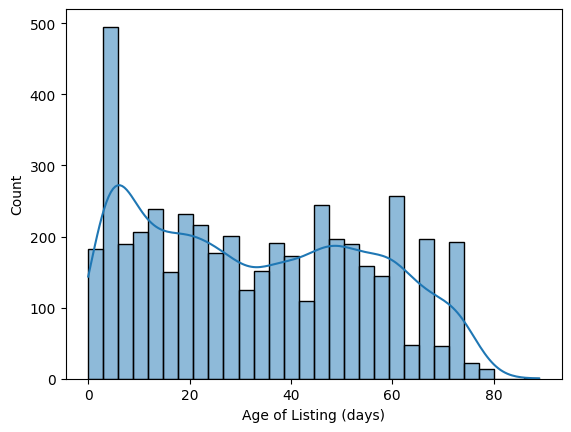

In [2553]:
sns.histplot(data['Age of Listing (days)'], bins=30, kde=True)

### Split the data of 'Floor' column to 'Floor Level' and 'Total Floors'


Split the 'Floor' column to determine if there are non-integers in the data


In [2554]:
split_floor_data = data['Floor'].str.split(' out of ', expand=True)
floor_number_data = split_floor_data[0]
total_floor_data = split_floor_data[1]


def find_non_integers(data):
    non_integers = []

    for item in data.unique():
        if item is None:  # There are cases that there are no other floors
            continue
        try:
            int(item)
        except ValueError:
            non_integers.append(item)

    return non_integers


non_integers_floor_number_data = find_non_integers(floor_number_data)
non_integers_total_floor_data = find_non_integers(total_floor_data)

print("Floor numbers with non-integers values: ", non_integers_floor_number_data)
print("Total floors with non-integers values: ", non_integers_total_floor_data)

Floor numbers with non-integers values:  ['Ground', 'Upper Basement', 'Lower Basement']
Total floors with non-integers values:  []


Assign integer to string values of floor


In [2555]:
def assign_int_to_floor(data):
    if data == 'Ground':
        return 0
    elif data == 'Upper Basement':
        return -1
    elif data == "Lower Basement":
        return -2
    else:
        try:
            return int(data)
        except ValueError:
            return None


data['Floor Number'] = split_floor_data[0].apply(assign_int_to_floor)
data['Total Floors'] = split_floor_data[1].apply(
    pd.to_numeric, errors='coerce').fillna(data['Floor Number']).astype(int)  # Assign the same floor number if there are NaN values

data.drop(columns=['Floor'], inplace=True)
data.head(5)

,BHK,Rent,Size,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact,Age of Listing (days),Floor Number,Total Floors
0,2,10000,1100,Super Area,Bandel,Kolkata,Unfurnished,Bachelors/Family,2,Contact Owner,54,0,2
1,2,20000,800,Super Area,"Phool Bagan, Kankurgachi",Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner,59,1,3
2,2,17000,1000,Super Area,Salt Lake City Sector 2,Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner,56,1,3
3,2,10000,800,Super Area,Dumdum Park,Kolkata,Unfurnished,Bachelors/Family,1,Contact Owner,7,1,2
4,2,7500,850,Carpet Area,South Dum Dum,Kolkata,Unfurnished,Bachelors,1,Contact Owner,63,1,2


In [2556]:
mask = data['Floor Number'] > data['Total Floors']
rows_with_greater_floor_number = data[mask]
rows_with_greater_floor_number

,BHK,Rent,Size,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact,Age of Listing (days),Floor Number,Total Floors
105,1,6000,600,Carpet Area,Pratiraksha Nagar,Kolkata,Unfurnished,Bachelors/Family,1,Contact Owner,35,8,5
161,2,10000,450,Carpet Area,Behala,Kolkata,Semi-Furnished,Bachelors/Family,2,Contact Owner,14,2,1


Switch the values of floor number and total floors if 'Floor Number' is greater than 'Total Floors'


In [2557]:
for index, row in data.iterrows():
    if row['Floor Number'] > row['Total Floors']:
        data.at[index, 'Floor Number'], data.at[index, 'Total Floors'] = data.at[index,
                                                                                 'Total Floors'], data.at[index, 'Floor Number']

In [2558]:
specific_rows = data.iloc[[105, 161]]
specific_rows

,BHK,Rent,Size,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact,Age of Listing (days),Floor Number,Total Floors
105,1,6000,600,Carpet Area,Pratiraksha Nagar,Kolkata,Unfurnished,Bachelors/Family,1,Contact Owner,35,5,8
161,2,10000,450,Carpet Area,Behala,Kolkata,Semi-Furnished,Bachelors/Family,2,Contact Owner,14,1,2


Visualize the relationship of 'Floor Number' and 'Total Floors'


<Axes: xlabel='Floor Number', ylabel='Total Floors'>

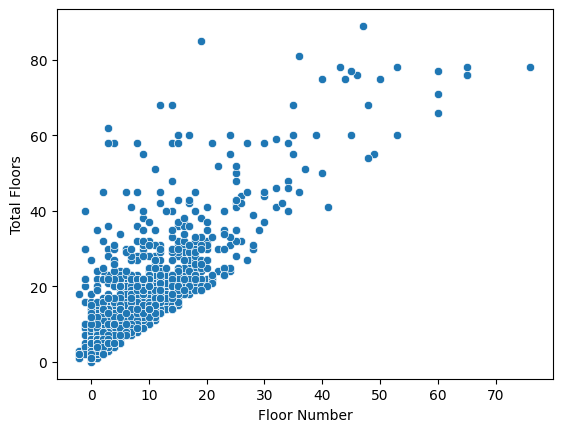

In [2559]:
sns.scatterplot(data=data, x="Floor Number", y="Total Floors")

### Feature Selection


In [2560]:
data.drop(columns=['Point of Contact', 'Area Locality',
          'Tenant Preferred'], inplace=True)

data

,BHK,Rent,Size,Area Type,City,Furnishing Status,Bathroom,Age of Listing (days),Floor Number,Total Floors
0,2,10000,1100,Super Area,Kolkata,Unfurnished,2,54,0,2
1,2,20000,800,Super Area,Kolkata,Semi-Furnished,1,59,1,3
2,2,17000,1000,Super Area,Kolkata,Semi-Furnished,1,56,1,3
3,2,10000,800,Super Area,Kolkata,Unfurnished,1,7,1,2
4,2,7500,850,Carpet Area,Kolkata,Unfurnished,1,63,1,2
...,...,...,...,...,...,...,...,...,...,...
4741,2,15000,1000,Carpet Area,Hyderabad,Semi-Furnished,2,54,3,5
4742,3,29000,2000,Super Area,Hyderabad,Semi-Furnished,3,57,1,4
4743,3,35000,1750,Carpet Area,Hyderabad,Semi-Furnished,3,1,3,5
4744,3,45000,1500,Carpet Area,Hyderabad,Semi-Furnished,2,5,23,34


### One-Hot Encoding


In [2561]:
def one_hot_encode(data, column):
    encoded = pd.get_dummies(data[column], drop_first=True)
    data = data.drop(column, axis=1)
    data = data.join(encoded)
    return data

In [2562]:
data = one_hot_encode(data, 'Area Type')
data = one_hot_encode(data, 'City')
data = one_hot_encode(data, 'Furnishing Status')

data

,BHK,Rent,Size,Bathroom,Age of Listing (days),Floor Number,Total Floors,Carpet Area,Super Area,Chennai,Delhi,Hyderabad,Kolkata,Mumbai,Semi-Furnished,Unfurnished
0,2,10000,1100,2,54,0,2,False,True,False,False,False,True,False,False,True
1,2,20000,800,1,59,1,3,False,True,False,False,False,True,False,True,False
2,2,17000,1000,1,56,1,3,False,True,False,False,False,True,False,True,False
3,2,10000,800,1,7,1,2,False,True,False,False,False,True,False,False,True
4,2,7500,850,1,63,1,2,True,False,False,False,False,True,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4741,2,15000,1000,2,54,3,5,True,False,False,False,True,False,False,True,False
4742,3,29000,2000,3,57,1,4,False,True,False,False,True,False,False,True,False
4743,3,35000,1750,3,1,3,5,True,False,False,False,True,False,False,True,False
4744,3,45000,1500,2,5,23,34,True,False,False,False,True,False,False,True,False


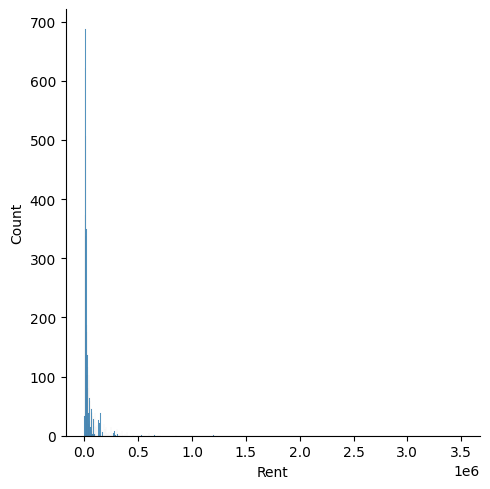

In [2563]:
sns.displot(data['Rent'])

### Splitting the Dataset


In [2564]:
X = data.drop('Rent', axis=1)
y = data['Rent']

In [2565]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

### Feature Transformation


In [2566]:
from sklearn.preprocessing import PolynomialFeatures
sc = PolynomialFeatures()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

## Modelling


In [2567]:
from sklearn import linear_model
model = linear_model.Ridge(alpha=1.0)
model.fit(X_train, y_train)

d:\Programming Files\Python\Lib\site-packages\sklearn\linear_model\_ridge.py:204: LinAlgWarning: Ill-conditioned matrix (rcond=3.30464e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


Ridge()

## Evaluation


Quantitative Evaluation


In [2568]:
from sklearn.metrics import mean_squared_error, r2_score
y_preds = model.predict(X_test)

The mean squared error


In [2569]:
print("Mean squared error: %.2f" % mean_squared_error(y_test, y_preds))

Mean squared error: 760954866.16


The coefficient of determination: 1 is perfect prediction


In [2570]:
print("Coefficient of determination: %.2f" % r2_score(y_test, y_preds))

Coefficient of determination: 0.81


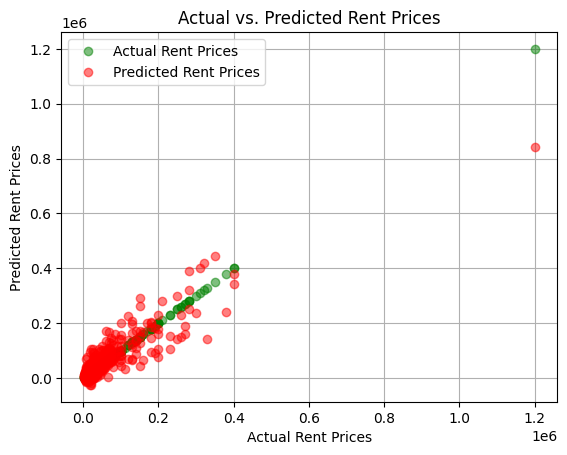

In [2571]:

plt.plot(y_test, y_test, 'o', alpha=0.5,
         color='green', label='Actual Rent Prices')
plt.plot(y_test, y_preds, 'o', alpha=0.5,
         color='red', label='Predicted Rent Prices')

plt.title("Actual vs. Predicted Rent Prices")
plt.xlabel("Actual Rent Prices")
plt.ylabel("Predicted Rent Prices")

plt.legend()
plt.grid(True)
plt.show()